In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:

from tqdm import tqdm
from concurrent.futures import ThreadPoolExecutor

In [4]:
board = {
    6: 16,
    8: 41,
    26: 29,
    50: 93,
    55: 80,
    59: 84,
    32: 13,
    60: 38,
    63: 3,
    70: 25,
    73: 47,
    82: 43,
    89: 53,
    97: 12
}

In [5]:
def simulate_snakes_ladders(board, max_pos=100):
    pos = [0, 0]  # Initial positions of Player 1 and Player 2
    turns = [[], []]  # Record of positions per turn
    player = 0  # Player 0 starts

    while max(pos) < max_pos:
        die_roll = np.random.randint(1, 7)  # Roll a die (1 to 6)
        new_pos = pos[player] + die_roll
        # Check if landed on a snake or ladder
        if new_pos in board:
            new_pos = board[new_pos]
        # Update position if within board limit
        if new_pos <= max_pos:
            pos[player] = new_pos
        # Record the move
        turns[player].append(pos[player])
        # Switch to the next player
        player = 1 - player

    return turns

In [6]:
def plot_moves(moves):
    plt.figure(figsize=(10, 5))
    plt.plot(moves[0], label='Player 1', color='blue', marker='o')
    plt.plot(moves[1], label='Player 2', color='red', marker='o')
    plt.xlabel('Turns')
    plt.ylabel('Position on Board')
    plt.title('Snakes and Ladders Game Simulation')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

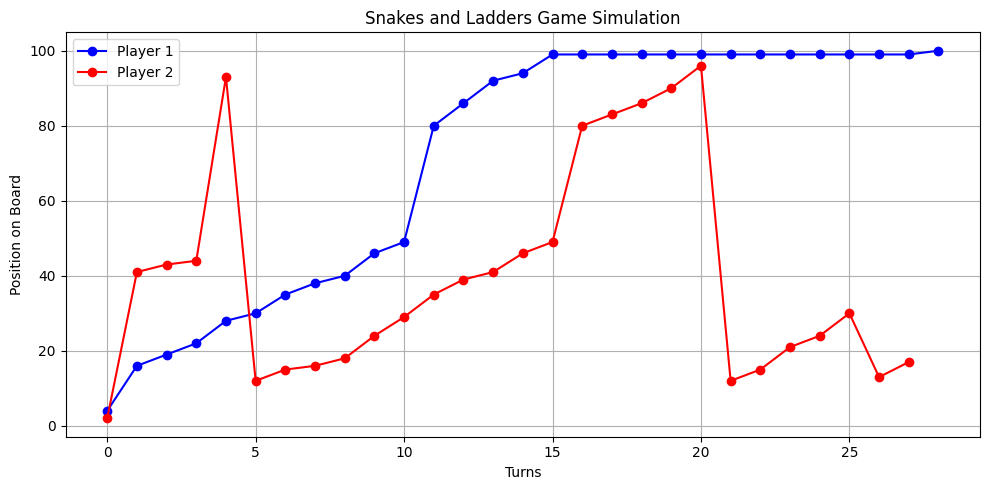

In [7]:
moves_1 = simulate_snakes_ladders(board)
plot_moves(moves_1)

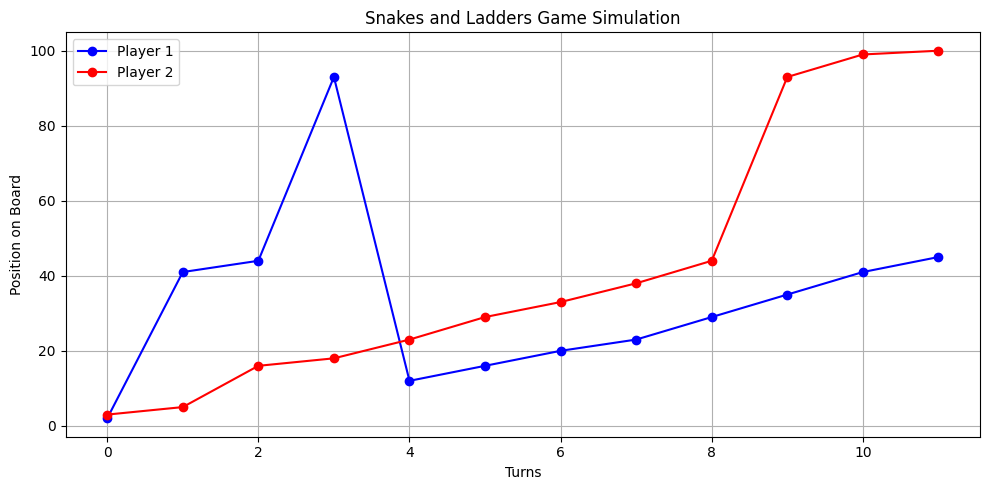

In [8]:
moves_2 = simulate_snakes_ladders(board)
plot_moves(moves_2)

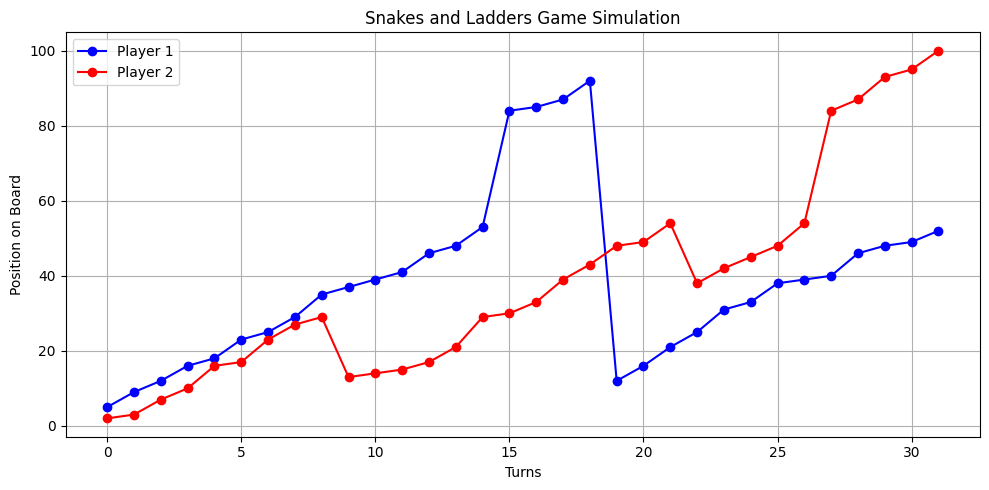

In [9]:
moves_3 = simulate_snakes_ladders(board)
plot_moves(moves_3)

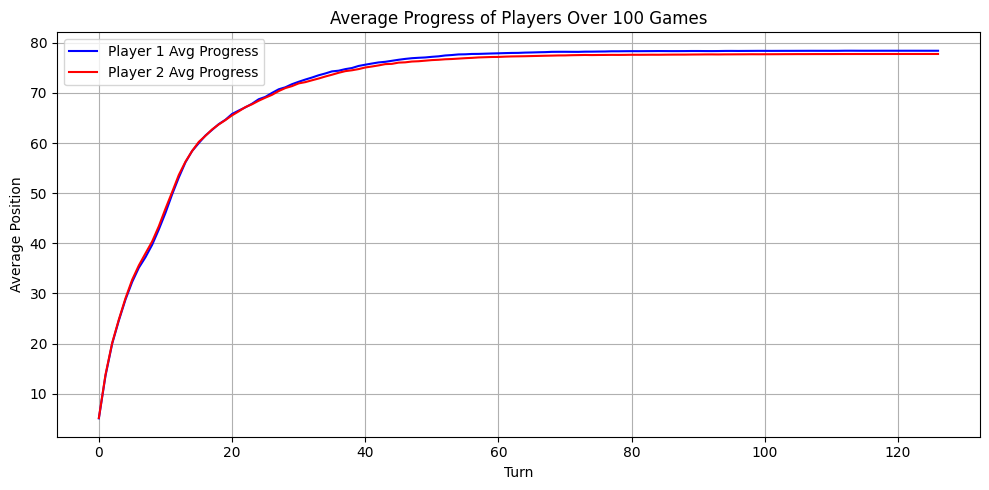

In [10]:
simulations = 10000
max_turns = 0
all_moves_p1 = []
all_moves_p2 = []

for _ in range(simulations):
    moves = simulate_snakes_ladders(board)
    # Normalize turn lengths
    max_turns = max(max_turns, max(len(moves[0]), len(moves[1])))
    all_moves_p1.append(moves[0])
    all_moves_p2.append(moves[1])

# Pad shorter runs with last position to make equal-length arrays
def pad_moves(moves_list, max_len):
    padded = []
    for moves in moves_list:
        last_val = moves[-1] if moves else 0
        padded.append(moves + [last_val] * (max_len - len(moves)))
    return np.array(padded)

p1_array = pad_moves(all_moves_p1, max_turns)
p2_array = pad_moves(all_moves_p2, max_turns)

# Calculate mean positions over turns
mean_p1 = np.mean(p1_array, axis=0)
mean_p2 = np.mean(p2_array, axis=0)

# Plot average game progress
plt.figure(figsize=(10, 5))
plt.plot(mean_p1, label='Player 1 Avg Progress', color='blue')
plt.plot(mean_p2, label='Player 2 Avg Progress', color='red')
plt.xlabel('Turn')
plt.ylabel('Average Position')
plt.title('Average Progress of Players Over 100 Games')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [11]:
simulations = 10000
wins = [0, 0]
ladder_hits = [0, 0]
snake_hits = [0, 0]
total_turns = []

for _ in range(simulations):
    pos = [0, 0]
    turns = 0
    player = 0
    while max(pos) < 100:
        roll = np.random.randint(1, 7)
        next_pos = pos[player] + roll
        if next_pos in board:
            if board[next_pos] > next_pos:
                ladder_hits[player] += 1
            elif board[next_pos] < next_pos:
                snake_hits[player] += 1
            next_pos = board[next_pos]
        if next_pos <= 100:
            pos[player] = next_pos
        turns += 1
        if pos[player] >= 100:
            wins[player] += 1
            break
        player = 1 - player
    total_turns.append(turns)

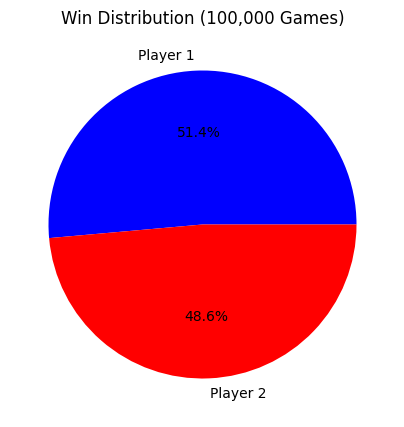

In [12]:
plt.figure(figsize=(5, 5))
plt.pie(wins, labels=['Player 1', 'Player 2'], autopct='%1.1f%%', colors=['blue', 'red'])
plt.title('Win Distribution (100,000 Games)')
plt.show()

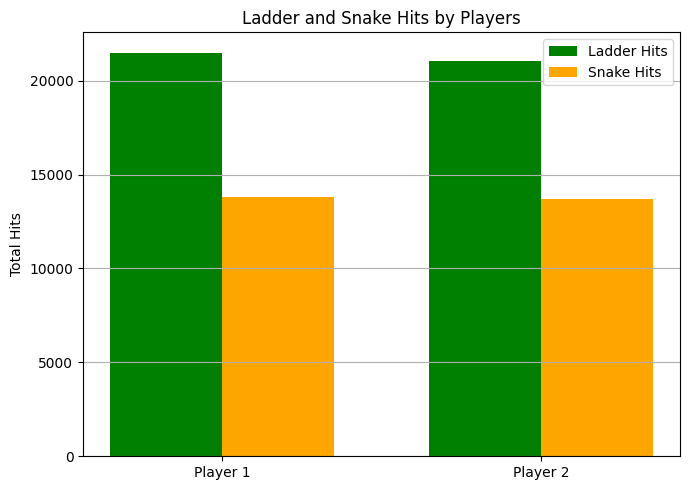

In [13]:
labels = ['Player 1', 'Player 2']
x = np.arange(len(labels))

width = 0.35
fig, ax = plt.subplots(figsize=(7, 5))
bar1 = ax.bar(x - width/2, ladder_hits, width, label='Ladder Hits', color='green')
bar2 = ax.bar(x + width/2, snake_hits, width, label='Snake Hits', color='orange')

ax.set_ylabel('Total Hits')
ax.set_title('Ladder and Snake Hits by Players')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

# Maximizer Agent

In [14]:
def maximizer_sal_agent(board, max_pos=100):
    pos = [0, 0]
    turns = [[], []]
    player = 0

    ladder_hits = [0, 0]
    snake_hits = [0, 0]

    while max(pos) < max_pos:
        roll1 = np.random.randint(1, 7)
        roll2 = np.random.randint(1, 7)
        die_roll = max(roll1, roll2)

        new_pos = pos[player] + die_roll

        if new_pos in board:
            if board[new_pos] > new_pos:
                ladder_hits[player] += 1
            elif board[new_pos] < new_pos:
                snake_hits[player] += 1
            new_pos = board[new_pos]

        if new_pos <= max_pos:
            pos[player] = new_pos

        turns[player].append(pos[player])
        player = 1 - player

    return turns, ladder_hits, snake_hits


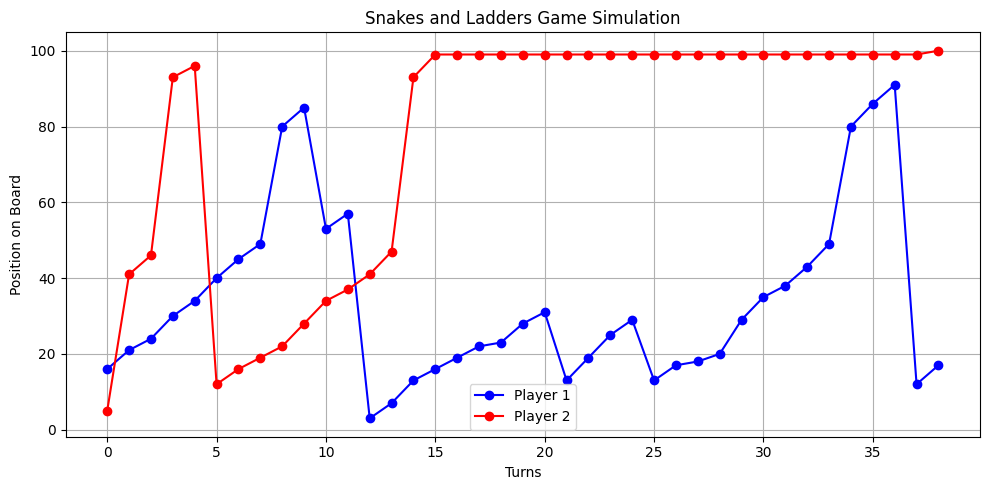

In [15]:
maximizer_moves, _, _ = maximizer_sal_agent(board)
plot_moves(maximizer_moves)

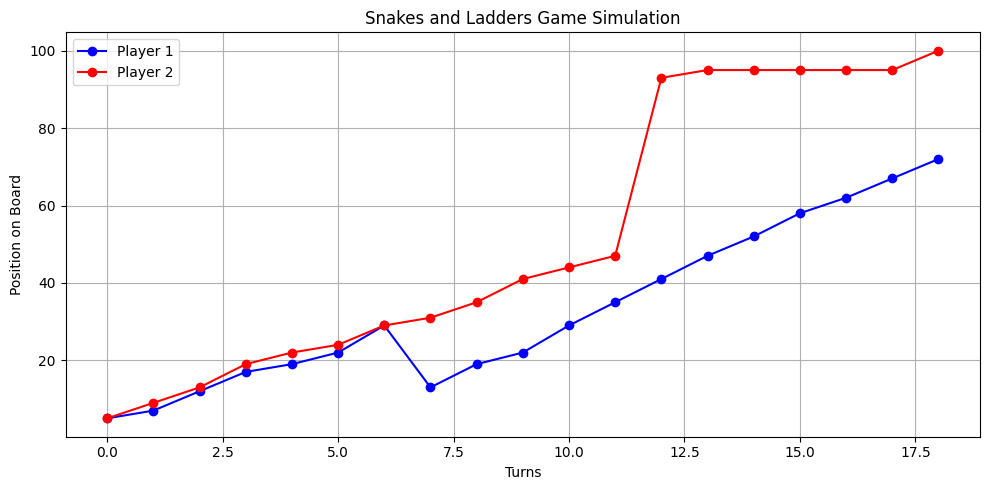

In [16]:
maximizer_moves_2, _, _ = maximizer_sal_agent(board)
plot_moves(maximizer_moves_2)

In [17]:
n_simulations = 10000
wins = [0, 0]  # Player 0 and Player 1 win count
game_lengths = []
all_turns_p0 = []
all_turns_p1 = []
ladder_hits = [0, 0]
snake_hits = [0, 0]

for _ in range(n_simulations):
    turns, ladders, snakes = maximizer_sal_agent(board)
    total_turns = len(turns[0]) + len(turns[1])
    game_lengths.append(total_turns)

    # Determine winner (shorter turn list means the player won)
    if len(turns[0]) > len(turns[1]):
        wins[1] += 1
    else:
        wins[0] += 1

    # Accumulate ladder/snake hits
    ladder_hits[0] += ladders[0]
    ladder_hits[1] += ladders[1]
    snake_hits[0] += snakes[0]
    snake_hits[1] += snakes[1]

    # Align lengths for plotting
    max_len = max(len(turns[0]), len(turns[1]))
    p0 = turns[0] + [turns[0][-1]] * (max_len - len(turns[0]))
    p1 = turns[1] + [turns[1][-1]] * (max_len - len(turns[1]))
    all_turns_p0.append(p0)
    all_turns_p1.append(p1)


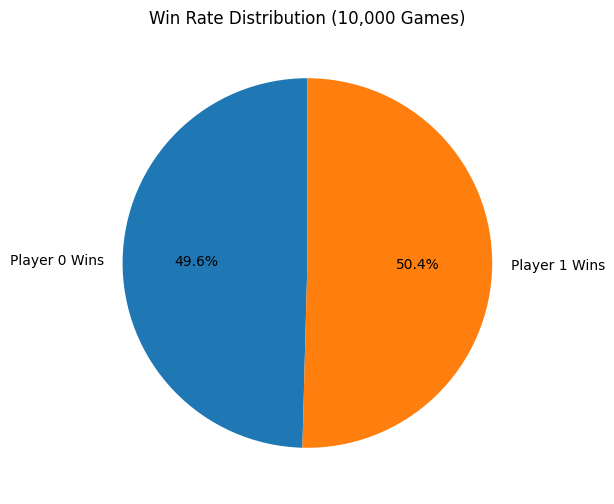

In [18]:
labels = ['Player 0 Wins', 'Player 1 Wins']
plt.figure(figsize=(6, 6))
plt.pie(wins, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Win Rate Distribution (10,000 Games)')
plt.show()

Average Game Length (Total Turns per Game): 61.64


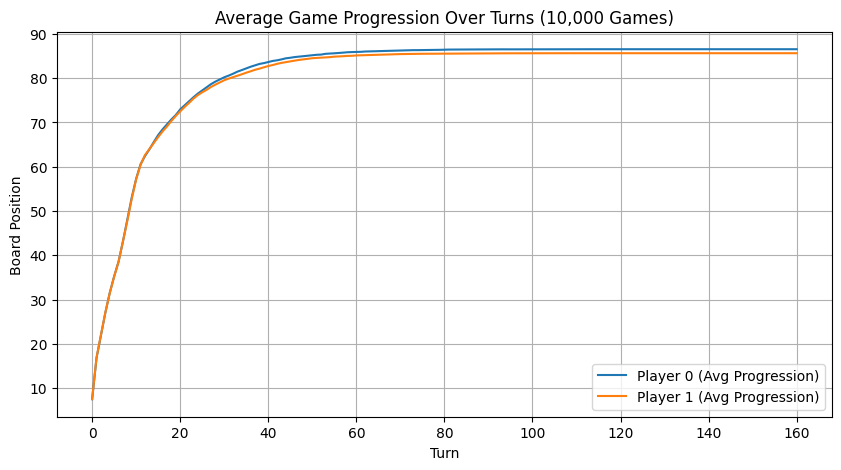

In [19]:
import numpy as np

# Average game length
avg_length = np.mean(game_lengths)
print(f"Average Game Length (Total Turns per Game): {avg_length:.2f}")

# Compute average progression per turn
max_turns = max(len(t) for t in all_turns_p0)
avg_p0 = np.mean([t + [t[-1]] * (max_turns - len(t)) for t in all_turns_p0], axis=0)
avg_p1 = np.mean([t + [t[-1]] * (max_turns - len(t)) for t in all_turns_p1], axis=0)

# Plot progression
plt.figure(figsize=(10, 5))
plt.plot(avg_p0, label='Player 0 (Avg Progression)')
plt.plot(avg_p1, label='Player 1 (Avg Progression)')
plt.xlabel('Turn')
plt.ylabel('Board Position')
plt.title('Average Game Progression Over Turns (10,000 Games)')
plt.legend()
plt.grid(True)
plt.show()

# Minimizer

In [20]:
def minimizer_sal_agent(board, max_pos=100):
    pos = [0, 0]  # Starting positions of Player 1 and Player 2
    turns = [[], []]  # To record positions per turn
    player = 0  # Player 0 starts

    ladder_hits = [0, 0]
    snake_hits = [0, 0]

    while max(pos) < max_pos:
        roll1 = np.random.randint(1, 7)
        roll2 = np.random.randint(1, 7)
        die_roll = min(roll1, roll2)  # minimizing roll

        new_pos = pos[player] + die_roll

        if new_pos in board:
            if board[new_pos] > new_pos:
                ladder_hits[player] += 1
            elif board[new_pos] < new_pos:
                snake_hits[player] += 1
            new_pos = board[new_pos]

        if new_pos <= max_pos:
            pos[player] = new_pos

        turns[player].append(pos[player])
        player = 1 - player

    return turns, ladder_hits, snake_hits

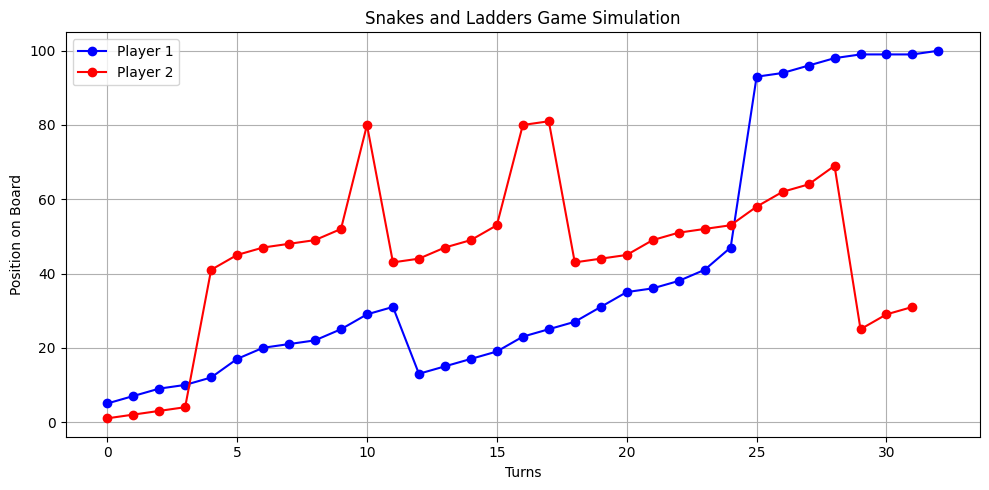

In [21]:
minimer_moves_1, _, _ = minimizer_sal_agent(board)
plot_moves(minimer_moves_1)

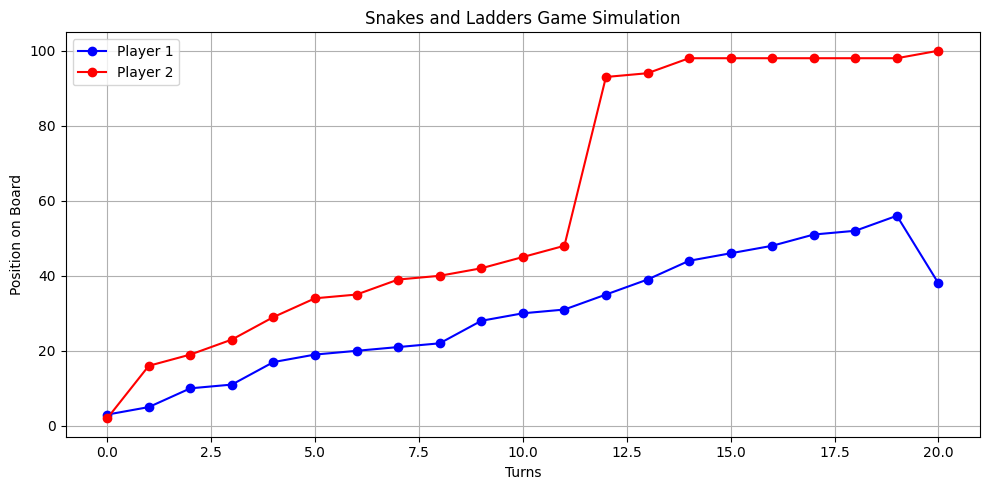

In [22]:
minimer_moves_2, _, _ = minimizer_sal_agent(board)
plot_moves(minimer_moves_2)

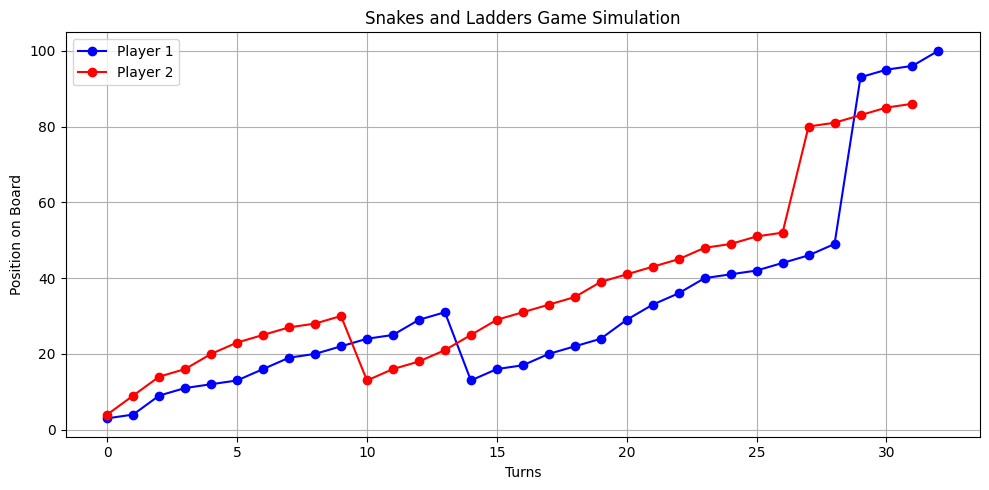

In [23]:
minimer_moves_3, _, _ = minimizer_sal_agent(board)
plot_moves(minimer_moves_3)

In [24]:
n_simulations = 10000
wins_min = [0, 0]  # Player 0 and Player 1 win counts
game_lengths_min = []
all_turns_p0_min = []
all_turns_p1_min = []
ladder_hits_min = [0, 0]
snake_hits_min = [0, 0]

for _ in range(n_simulations):
    turns, ladders, snakes = minimizer_sal_agent(board)
    total_turns = len(turns[0]) + len(turns[1])
    game_lengths_min.append(total_turns)

    if len(turns[0]) > len(turns[1]):
        wins_min[1] += 1
    else:
        wins_min[0] += 1

    ladder_hits_min[0] += ladders[0]
    ladder_hits_min[1] += ladders[1]
    snake_hits_min[0] += snakes[0]
    snake_hits_min[1] += snakes[1]

    max_len = max(len(turns[0]), len(turns[1]))
    p0 = turns[0] + [turns[0][-1]] * (max_len - len(turns[0]))
    p1 = turns[1] + [turns[1][-1]] * (max_len - len(turns[1]))
    all_turns_p0_min.append(p0)
    all_turns_p1_min.append(p1)

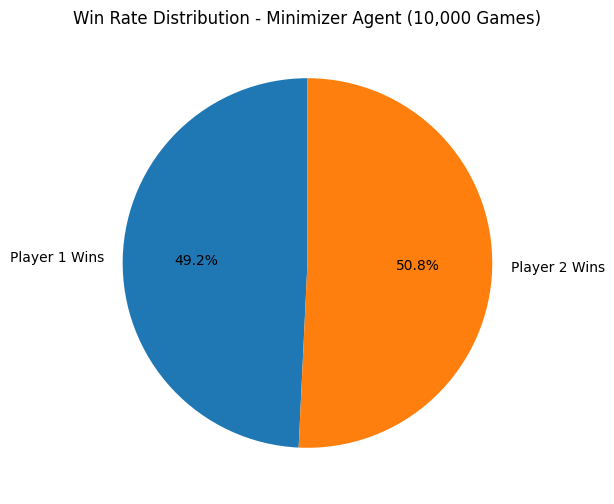

In [25]:
labels = ['Player 1 Wins', 'Player 2 Wins']
plt.figure(figsize=(6, 6))
plt.pie(wins_min, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Win Rate Distribution - Minimizer Agent (10,000 Games)')
plt.show()


Average Game Length (Minimizer Agent): 70.54 total turns


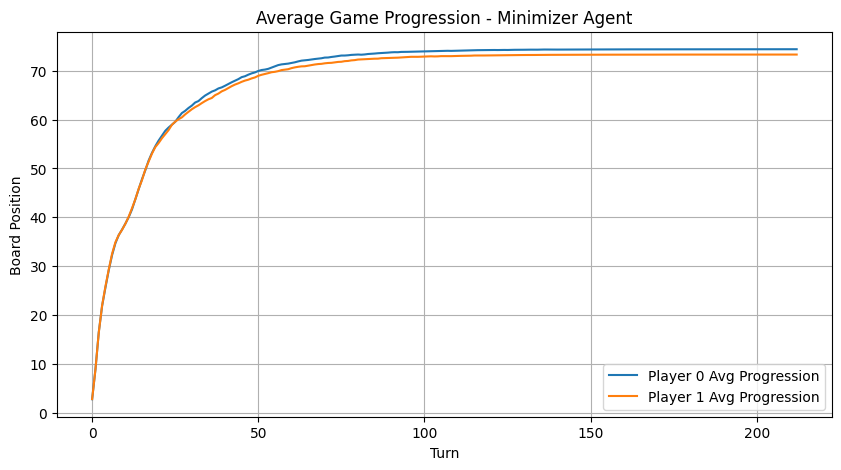

In [26]:
# Average game length
avg_len_min = np.mean(game_lengths_min)
print(f"Average Game Length (Minimizer Agent): {avg_len_min:.2f} total turns")

# Calculate average progression per turn
max_turns_min = max(len(t) for t in all_turns_p0_min)
avg_p0_min = np.mean([t + [t[-1]] * (max_turns_min - len(t)) for t in all_turns_p0_min], axis=0)
avg_p1_min = np.mean([t + [t[-1]] * (max_turns_min - len(t)) for t in all_turns_p1_min], axis=0)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(avg_p0_min, label='Player 0 Avg Progression')
plt.plot(avg_p1_min, label='Player 1 Avg Progression')
plt.xlabel('Turn')
plt.ylabel('Board Position')
plt.title('Average Game Progression - Minimizer Agent')
plt.legend()
plt.grid(True)
plt.show()

# Smart Maximizer

In [27]:
def choose_best_roll(pos, x, y, board):
    def outcome(p, roll):
        new = p + roll
        if new in board:
            return board[new]
        return new

    ox = outcome(pos, x)
    oy = outcome(pos, y)

    dx = ox - (pos + x)
    dy = oy - (pos + y)

    # Case a/b: ladder vs normal
    if dx > 0 and dy == 0:
        return x
    if dy > 0 and dx == 0:
        return y

    # Case c: one is snake
    if dx < 0 and dy >= 0:
        return y
    if dy < 0 and dx >= 0:
        return x

    # Case d: both ladders, pick higher
    if dx > 0 and dy > 0:
        return x if dx >= dy else y

    # Case e: both snakes, pick less punishment
    if dx < 0 and dy < 0:
        return x if dx >= dy else y

    # Case f: fallback
    return max(x, y)

In [28]:
def smart_maximizer_sal_agent(board, max_pos=100):
    pos = [0, 0]
    turns = [[], []]
    player = 0

    ladder_hits = [0, 0]
    snake_hits = [0, 0]

    while max(pos) < max_pos:
        roll1 = np.random.randint(1, 7)
        roll2 = np.random.randint(1, 7)
        die_roll = choose_best_roll(pos[player], roll1, roll2, board)

        new_pos = pos[player] + die_roll

        if new_pos in board:
            if board[new_pos] > new_pos:
                ladder_hits[player] += 1
            elif board[new_pos] < new_pos:
                snake_hits[player] += 1
            new_pos = board[new_pos]

        if new_pos <= max_pos:
            pos[player] = new_pos

        turns[player].append(pos[player])
        player = 1 - player

    return turns, ladder_hits, snake_hits

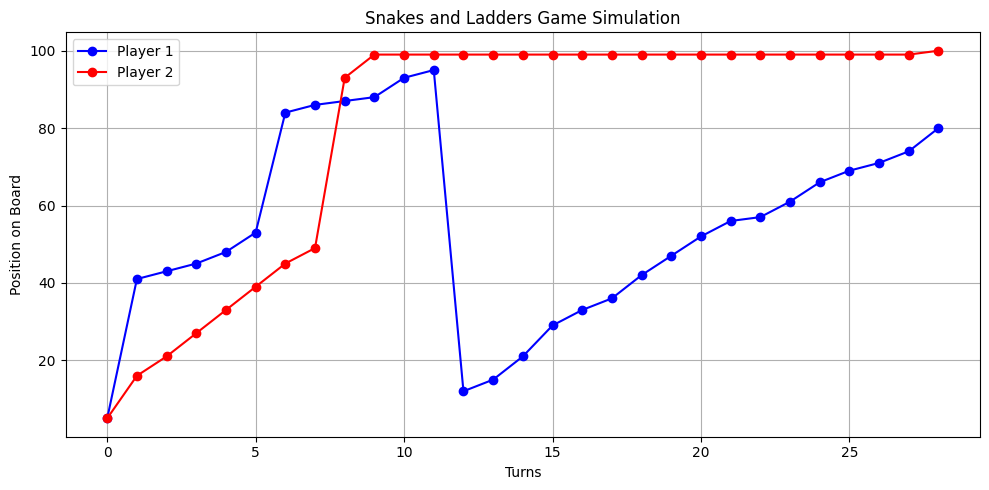

In [29]:
smart_moves, _, _ = smart_maximizer_sal_agent(board)
plot_moves(smart_moves)

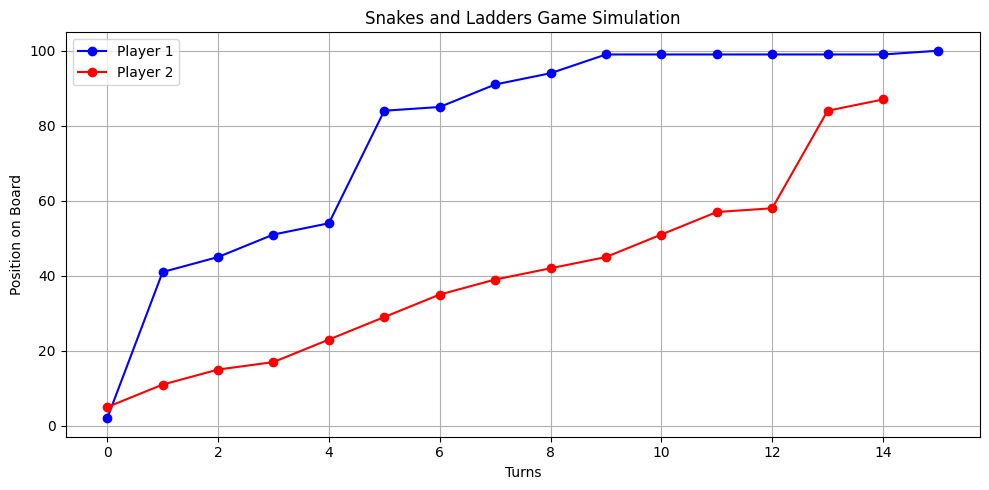

In [30]:
smart_moves_2, _, _ = smart_maximizer_sal_agent(board)
plot_moves(smart_moves_2)

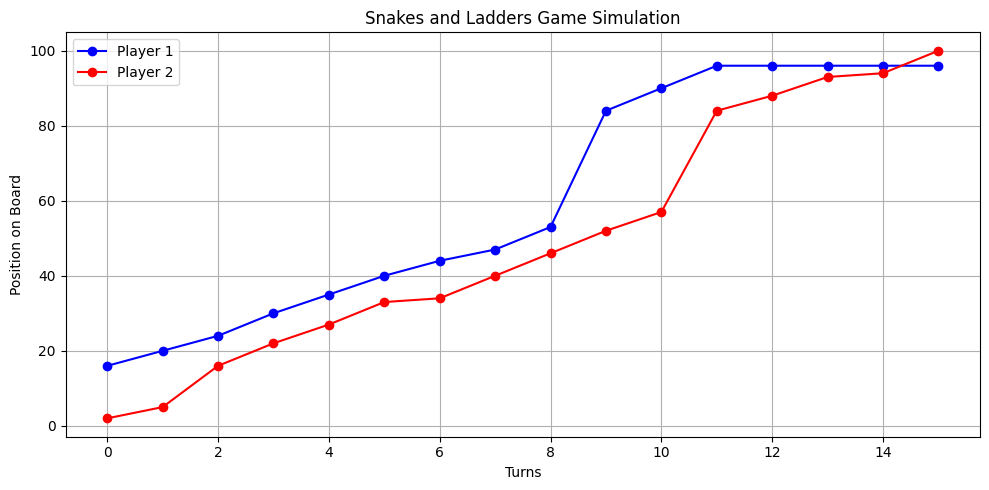

In [31]:
smart_moves_3, _, _ = smart_maximizer_sal_agent(board)
plot_moves(smart_moves_3)

In [32]:
n_simulations = 10000
wins_smart = [0, 0]
game_lengths_smart = []
all_turns_p0_smart = []
all_turns_p1_smart = []
ladder_hits_smart = [0, 0]
snake_hits_smart = [0, 0]

for _ in range(n_simulations):
    turns, ladders, snakes = smart_maximizer_sal_agent(board)
    total_turns = len(turns[0]) + len(turns[1])
    game_lengths_smart.append(total_turns)

    if len(turns[0]) > len(turns[1]):
        wins_smart[1] += 1
    else:
        wins_smart[0] += 1

    ladder_hits_smart[0] += ladders[0]
    ladder_hits_smart[1] += ladders[1]
    snake_hits_smart[0] += snakes[0]
    snake_hits_smart[1] += snakes[1]

    max_len = max(len(turns[0]), len(turns[1]))
    p0 = turns[0] + [turns[0][-1]] * (max_len - len(turns[0]))
    p1 = turns[1] + [turns[1][-1]] * (max_len - len(turns[1]))
    all_turns_p0_smart.append(p0)
    all_turns_p1_smart.append(p1)

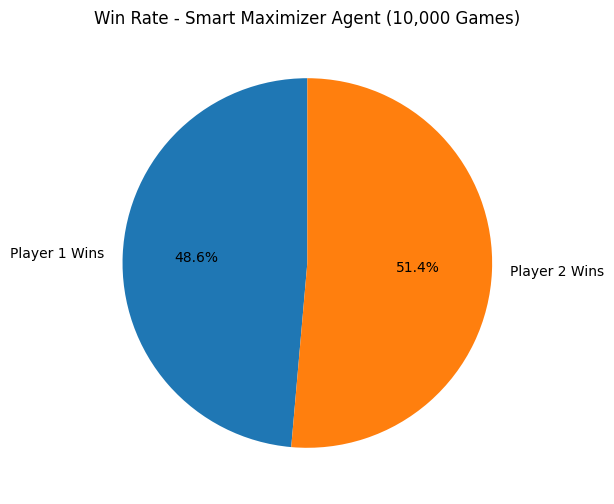

In [33]:
labels = ['Player 1 Wins', 'Player 2 Wins']
plt.figure(figsize=(6, 6))
plt.pie(wins_smart, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Win Rate - Smart Maximizer Agent (10,000 Games)')
plt.show()

Average Game Length (Smart Agent): 42.07 total turns


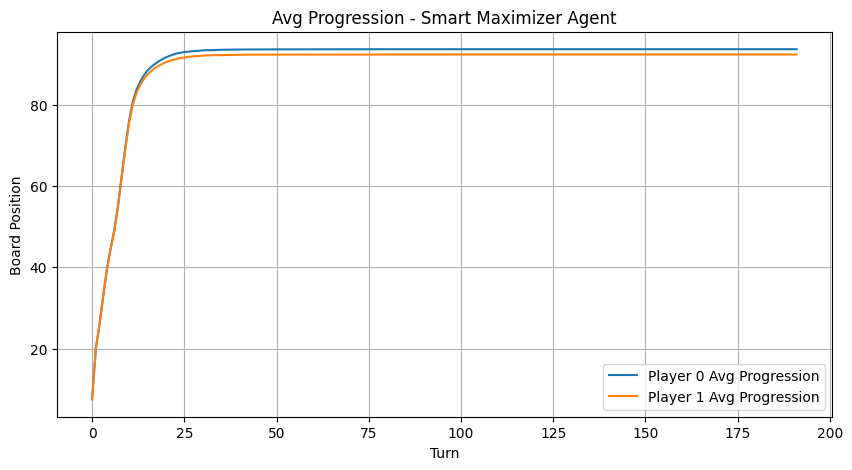

In [34]:
avg_len_smart = np.mean(game_lengths_smart)
print(f"Average Game Length (Smart Agent): {avg_len_smart:.2f} total turns")

max_turns_smart = max(len(t) for t in all_turns_p0_smart)
avg_p0_smart = np.mean([t + [t[-1]] * (max_turns_smart - len(t)) for t in all_turns_p0_smart], axis=0)
avg_p1_smart = np.mean([t + [t[-1]] * (max_turns_smart - len(t)) for t in all_turns_p1_smart], axis=0)

plt.figure(figsize=(10, 5))
plt.plot(avg_p0_smart, label='Player 0 Avg Progression')
plt.plot(avg_p1_smart, label='Player 1 Avg Progression')
plt.xlabel('Turn')
plt.ylabel('Board Position')
plt.title('Avg Progression - Smart Maximizer Agent')
plt.legend()
plt.grid(True)
plt.show()

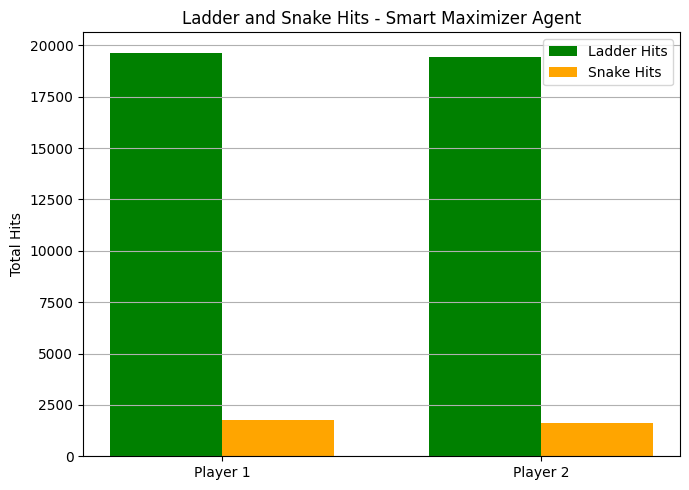

In [35]:
labels = ['Player 1', 'Player 2']
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(7, 5))
ax.bar(x - width/2, ladder_hits_smart, width, label='Ladder Hits', color='green')
ax.bar(x + width/2, snake_hits_smart, width, label='Snake Hits', color='orange')

ax.set_ylabel('Total Hits')
ax.set_title('Ladder and Snake Hits - Smart Maximizer Agent')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

# Skipper Agent

In [36]:
def skipper_sal_agent(board, max_pos=100):
    pos = [0, 0]
    turns = [[], []]
    player = 0

    ladder_hits = [0, 0]
    snake_hits = [0, 0]

    while max(pos) < max_pos:
        roll = np.random.randint(1, 7)
        tentative = pos[player] + roll

        should_move = True

        # If move goes beyond board, reject
        if tentative > max_pos:
            should_move = False
        # If snake, skip
        elif tentative in board and board[tentative] < tentative:
            should_move = False
        # If ladder, accept
        elif tentative in board and board[tentative] > tentative:
            should_move = True
        # If neutral, consider danger ahead
        else:
            nearby_danger = [
                (tentative + d) in board and board[tentative + d] < (tentative + d)
                for d in range(1, 3)
            ]
            if any(nearby_danger):
                should_move = False

        if should_move:
            new_pos = tentative
            if new_pos in board:
                if board[new_pos] > new_pos:
                    ladder_hits[player] += 1
                elif board[new_pos] < new_pos:
                    snake_hits[player] += 1
                new_pos = board[new_pos]
            pos[player] = new_pos

        # Record position (moved or skipped)
        turns[player].append(pos[player])
        player = 1 - player

    return turns, ladder_hits, snake_hits

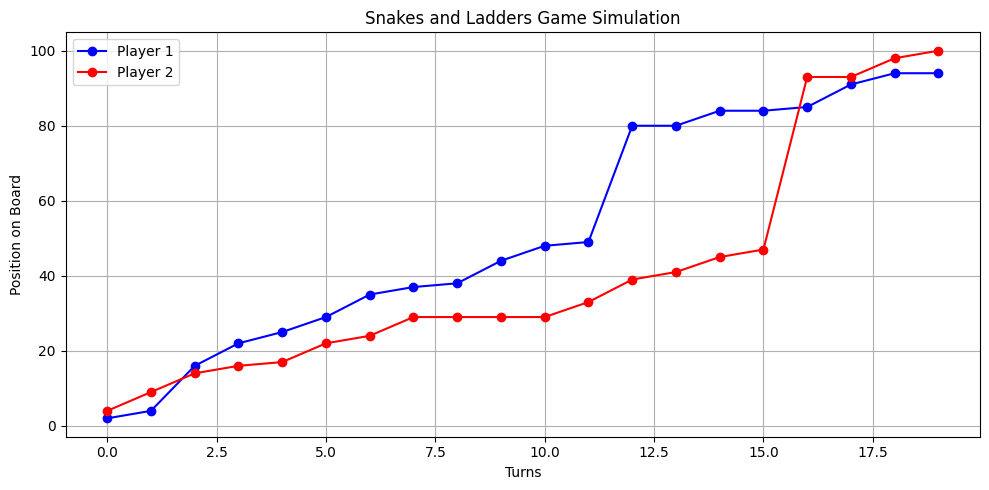

In [37]:
skipper_moves, _, _ = skipper_sal_agent(board)
plot_moves(skipper_moves)

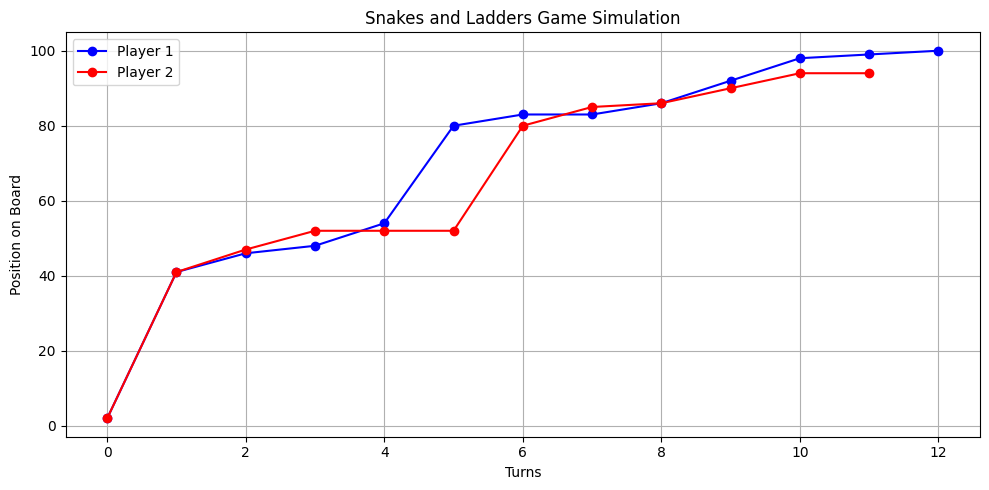

In [38]:
skipper_moves_2, _, _ = skipper_sal_agent(board)
plot_moves(skipper_moves_2)

In [39]:
n_simulations = 10000
wins_skipper = [0, 0]
game_lengths_skipper = []
all_turns_p0_skipper = []
all_turns_p1_skipper = []
ladder_hits_skipper = [0, 0]
snake_hits_skipper = [0, 0]

for _ in range(n_simulations):
    turns, ladders, snakes = skipper_sal_agent(board)
    total_turns = len(turns[0]) + len(turns[1])
    game_lengths_skipper.append(total_turns)

    if len(turns[0]) > len(turns[1]):
        wins_skipper[1] += 1
    else:
        wins_skipper[0] += 1

    ladder_hits_skipper[0] += ladders[0]
    ladder_hits_skipper[1] += ladders[1]
    snake_hits_skipper[0] += snakes[0]
    snake_hits_skipper[1] += snakes[1]

    max_len = max(len(turns[0]), len(turns[1]))
    p0 = turns[0] + [turns[0][-1]] * (max_len - len(turns[0]))
    p1 = turns[1] + [turns[1][-1]] * (max_len - len(turns[1]))
    all_turns_p0_skipper.append(p0)
    all_turns_p1_skipper.append(p1)

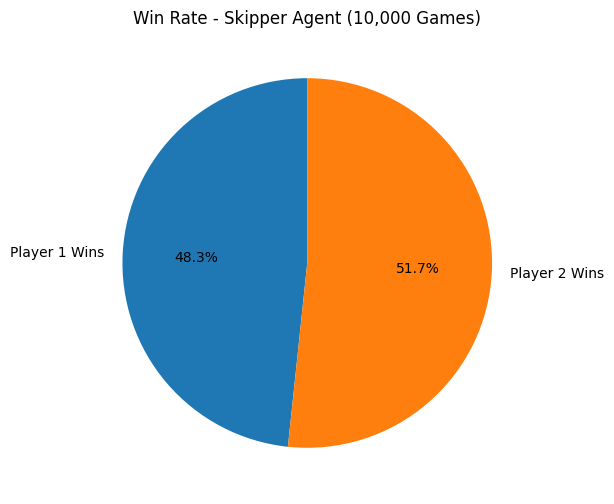

In [40]:
labels = ['Player 1 Wins', 'Player 2 Wins']
plt.figure(figsize=(6, 6))
plt.pie(wins_skipper, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Win Rate - Skipper Agent (10,000 Games)')
plt.show()

Average Game Length (Skipper Agent): 44.46 total turns


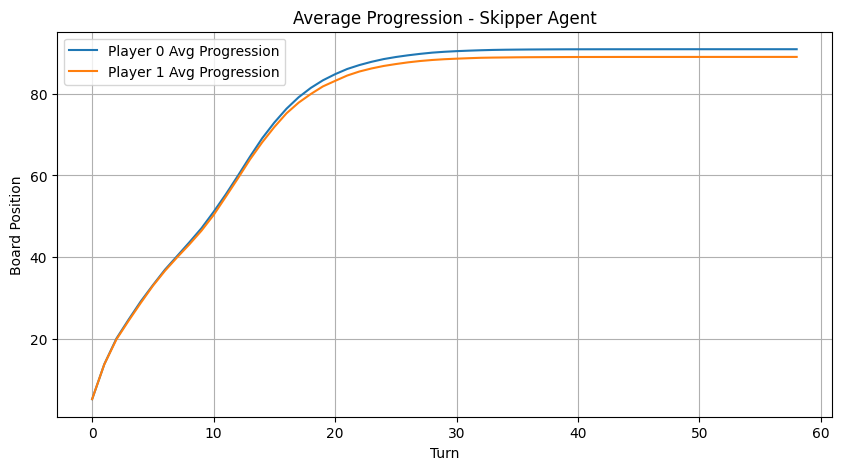

In [41]:
avg_len_skipper = np.mean(game_lengths_skipper)
print(f"Average Game Length (Skipper Agent): {avg_len_skipper:.2f} total turns")

max_turns_skipper = max(len(t) for t in all_turns_p0_skipper)
avg_p0_skipper = np.mean([t + [t[-1]] * (max_turns_skipper - len(t)) for t in all_turns_p0_skipper], axis=0)
avg_p1_skipper = np.mean([t + [t[-1]] * (max_turns_skipper - len(t)) for t in all_turns_p1_skipper], axis=0)

plt.figure(figsize=(10, 5))
plt.plot(avg_p0_skipper, label='Player 0 Avg Progression')
plt.plot(avg_p1_skipper, label='Player 1 Avg Progression')
plt.xlabel('Turn')
plt.ylabel('Board Position')
plt.title('Average Progression - Skipper Agent')
plt.legend()
plt.grid(True)
plt.show()

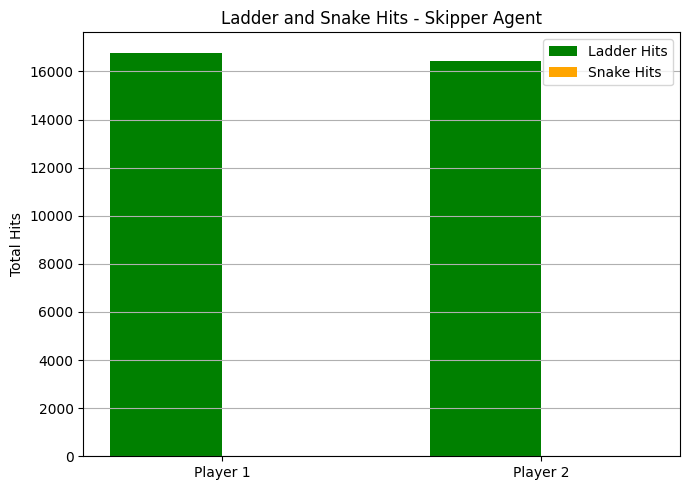

In [42]:
labels = ['Player 1', 'Player 2']
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(7, 5))
ax.bar(x - width/2, ladder_hits_skipper, width, label='Ladder Hits', color='green')
ax.bar(x + width/2, snake_hits_skipper, width, label='Snake Hits', color='orange')

ax.set_ylabel('Total Hits')
ax.set_title('Ladder and Snake Hits - Skipper Agent')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

# Bounded Skipper Agent
> Can not skip more than 3 times in a row


In [43]:
def bounded_skipper_sal_agent(board, max_pos=100):
    pos = [0, 0]
    turns = [[], []]
    skip_streak = [0, 0]  # tracks consecutive skips per player
    player = 0

    ladder_hits = [0, 0]
    snake_hits = [0, 0]

    while max(pos) < max_pos:
        roll = np.random.randint(1, 7)
        tentative = pos[player] + roll
        must_move = skip_streak[player] >= 3
        should_move = True

        if tentative > max_pos:
            should_move = False
        elif not must_move:
            # Skip if it's a snake
            if tentative in board and board[tentative] < tentative:
                should_move = False
            # Take if ladder
            elif tentative in board and board[tentative] > tentative:
                should_move = True
            else:
                # Check if danger ahead
                danger_ahead = any(
                    (tentative + d) in board and board[tentative + d] < (tentative + d)
                    for d in range(1, 3)
                )
                should_move = not danger_ahead
        else:
            should_move = True  # Forced to move after 3 skips

        if should_move:
            new_pos = tentative
            if new_pos in board:
                if board[new_pos] > new_pos:
                    ladder_hits[player] += 1
                elif board[new_pos] < new_pos:
                    snake_hits[player] += 1
                new_pos = board[new_pos]
            pos[player] = new_pos
            skip_streak[player] = 0
        else:
            skip_streak[player] += 1

        turns[player].append(pos[player])
        player = 1 - player

    return turns, ladder_hits, snake_hits

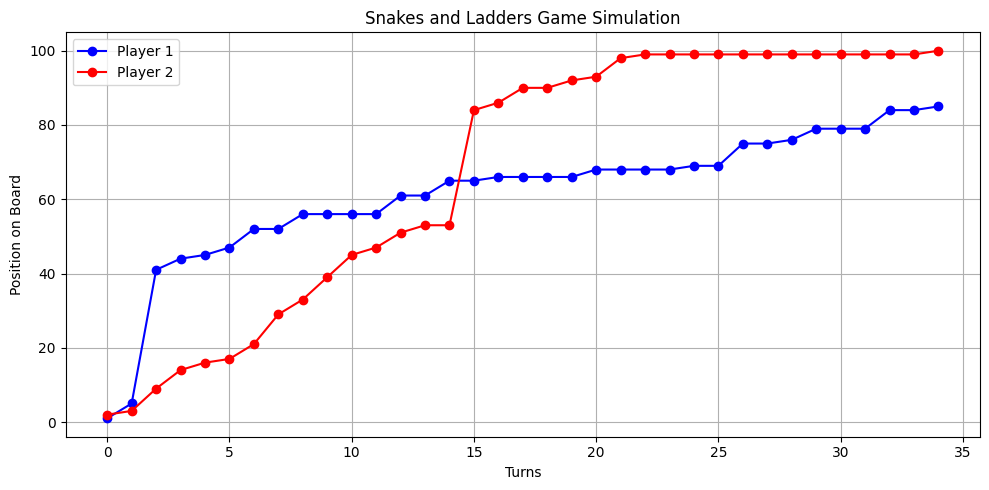

In [44]:
moves_bounded_skipper, _, _ = bounded_skipper_sal_agent(board)
plot_moves(moves_bounded_skipper)

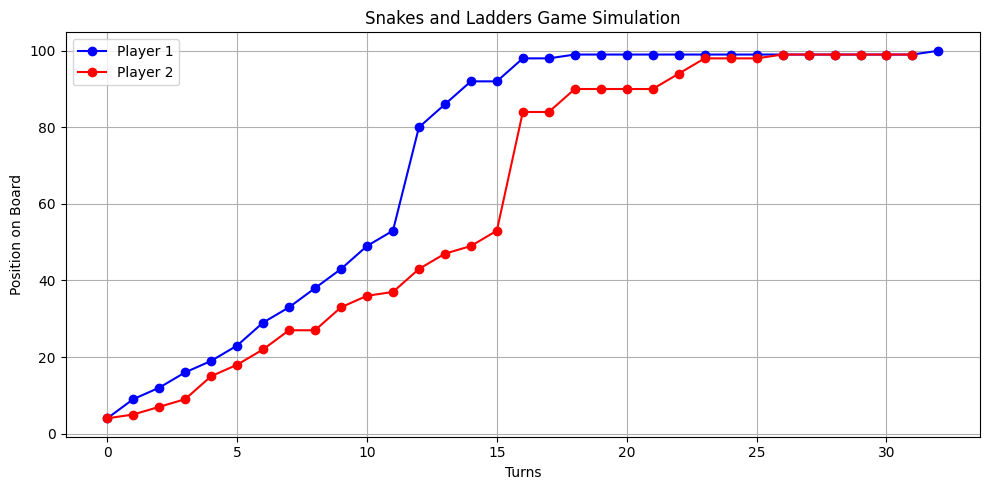

In [45]:
moves_bounded_skipper_1, _, _ = bounded_skipper_sal_agent(board)
plot_moves(moves_bounded_skipper_1)

In [46]:
n_simulations = 10000
wins_bskipper = [0, 0]
game_lengths_bskipper = []
all_turns_p0_bskipper = []
all_turns_p1_bskipper = []
ladder_hits_bskipper = [0, 0]
snake_hits_bskipper = [0, 0]

for _ in range(n_simulations):
    turns, ladders, snakes = bounded_skipper_sal_agent(board)
    total_turns = len(turns[0]) + len(turns[1])
    game_lengths_bskipper.append(total_turns)

    if len(turns[0]) > len(turns[1]):
        wins_bskipper[1] += 1
    else:
        wins_bskipper[0] += 1

    ladder_hits_bskipper[0] += ladders[0]
    ladder_hits_bskipper[1] += ladders[1]
    snake_hits_bskipper[0] += snakes[0]
    snake_hits_bskipper[1] += snakes[1]

    max_len = max(len(turns[0]), len(turns[1]))
    p0 = turns[0] + [turns[0][-1]] * (max_len - len(turns[0]))
    p1 = turns[1] + [turns[1][-1]] * (max_len - len(turns[1]))
    all_turns_p0_bskipper.append(p0)
    all_turns_p1_bskipper.append(p1)

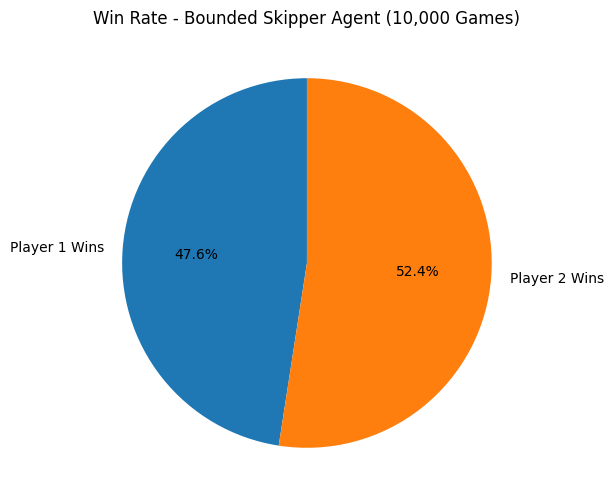

In [47]:
labels = ['Player 1 Wins', 'Player 2 Wins']
plt.figure(figsize=(6, 6))
plt.pie(wins_bskipper, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Win Rate - Bounded Skipper Agent (10,000 Games)')
plt.show()

Average Game Length (Bounded Skipper): 45.23 total turns


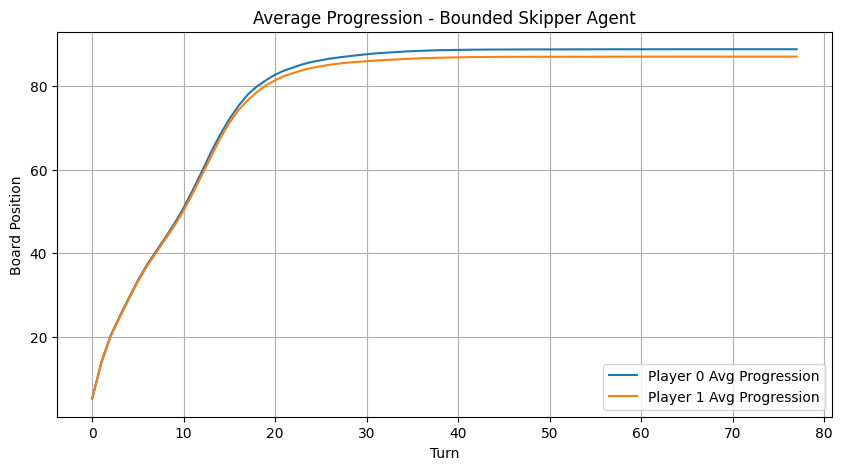

In [48]:
avg_len_bskipper = np.mean(game_lengths_bskipper)
print(f"Average Game Length (Bounded Skipper): {avg_len_bskipper:.2f} total turns")

max_turns_bskipper = max(len(t) for t in all_turns_p0_bskipper)
avg_p0_bskipper = np.mean([t + [t[-1]] * (max_turns_bskipper - len(t)) for t in all_turns_p0_bskipper], axis=0)
avg_p1_bskipper = np.mean([t + [t[-1]] * (max_turns_bskipper - len(t)) for t in all_turns_p1_bskipper], axis=0)

plt.figure(figsize=(10, 5))
plt.plot(avg_p0_bskipper, label='Player 0 Avg Progression')
plt.plot(avg_p1_bskipper, label='Player 1 Avg Progression')
plt.xlabel('Turn')
plt.ylabel('Board Position')
plt.title('Average Progression - Bounded Skipper Agent')
plt.legend()
plt.grid(True)
plt.show()

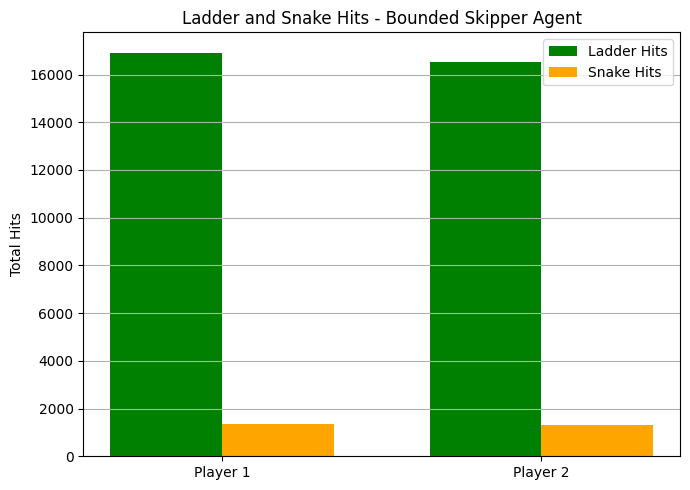

In [49]:
labels = ['Player 1', 'Player 2']
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(7, 5))
ax.bar(x - width/2, ladder_hits_bskipper, width, label='Ladder Hits', color='green')
ax.bar(x + width/2, snake_hits_bskipper, width, label='Snake Hits', color='orange')

ax.set_ylabel('Total Hits')
ax.set_title('Ladder and Snake Hits - Bounded Skipper Agent')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

# Compare

In [50]:
agents_results = {
    'Maximizer': {
        'wins': wins,
        'lengths': game_lengths,
        'ladder_hits': ladder_hits,
        'snake_hits': snake_hits,
        'p0_turns': all_turns_p0,
        'p1_turns': all_turns_p1
    },
    'Minimizer': {
        'wins': wins_min,
        'lengths': game_lengths_min,
        'ladder_hits': [0, 0],  # fill if tracked
        'snake_hits': [0, 0],
        'p0_turns': all_turns_p0_min,
        'p1_turns': all_turns_p1_min
    },
    'Smart Maximizer': {
        'wins': wins_smart,
        'lengths': game_lengths_smart,
        'ladder_hits': ladder_hits_smart,
        'snake_hits': snake_hits_smart,
        'p0_turns': all_turns_p0_smart,
        'p1_turns': all_turns_p1_smart
    },
    'Skipper': {
        'wins': wins_skipper,
        'lengths': game_lengths_skipper,
        'ladder_hits': ladder_hits_skipper,
        'snake_hits': snake_hits_skipper,
        'p0_turns': all_turns_p0_skipper,
        'p1_turns': all_turns_p1_skipper
    },
    'Bounded Skipper': {
        'wins': wins_bskipper,
        'lengths': game_lengths_bskipper,
        'ladder_hits': ladder_hits_bskipper,
        'snake_hits': snake_hits_bskipper,
        'p0_turns': all_turns_p0_bskipper,
        'p1_turns': all_turns_p1_bskipper
    }
}

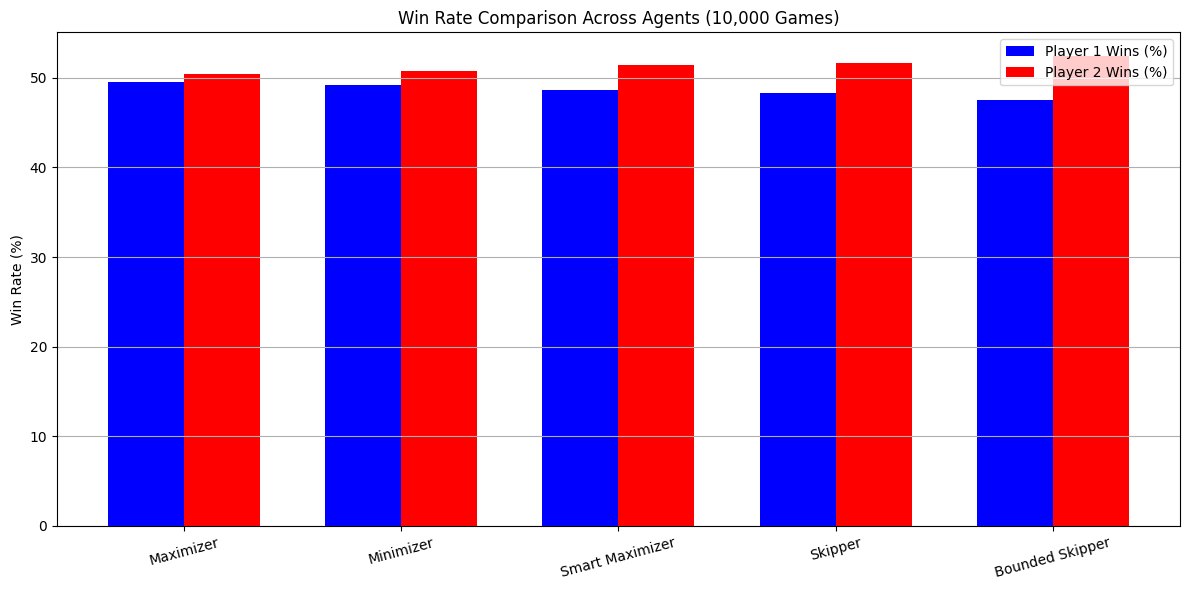

In [51]:
labels = list(agents_results.keys())
p1_winrates = [r['wins'][0] / sum(r['wins']) * 100 for r in agents_results.values()]
p2_winrates = [r['wins'][1] / sum(r['wins']) * 100 for r in agents_results.values()]
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(x - width/2, p1_winrates, width, label='Player 1 Wins (%)', color='blue')
ax.bar(x + width/2, p2_winrates, width, label='Player 2 Wins (%)', color='red')
ax.set_ylabel('Win Rate (%)')
ax.set_title('Win Rate Comparison Across Agents (10,000 Games)')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=15)
ax.legend()
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

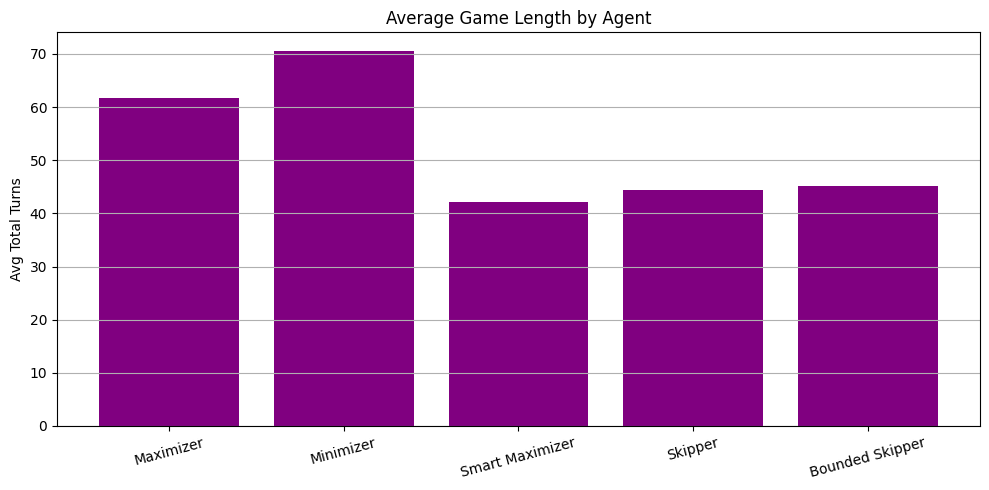

In [52]:
avg_lengths = [np.mean(r['lengths']) for r in agents_results.values()]

plt.figure(figsize=(10, 5))
plt.bar(labels, avg_lengths, color='purple')
plt.ylabel('Avg Total Turns')
plt.title('Average Game Length by Agent')
plt.xticks(rotation=15)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


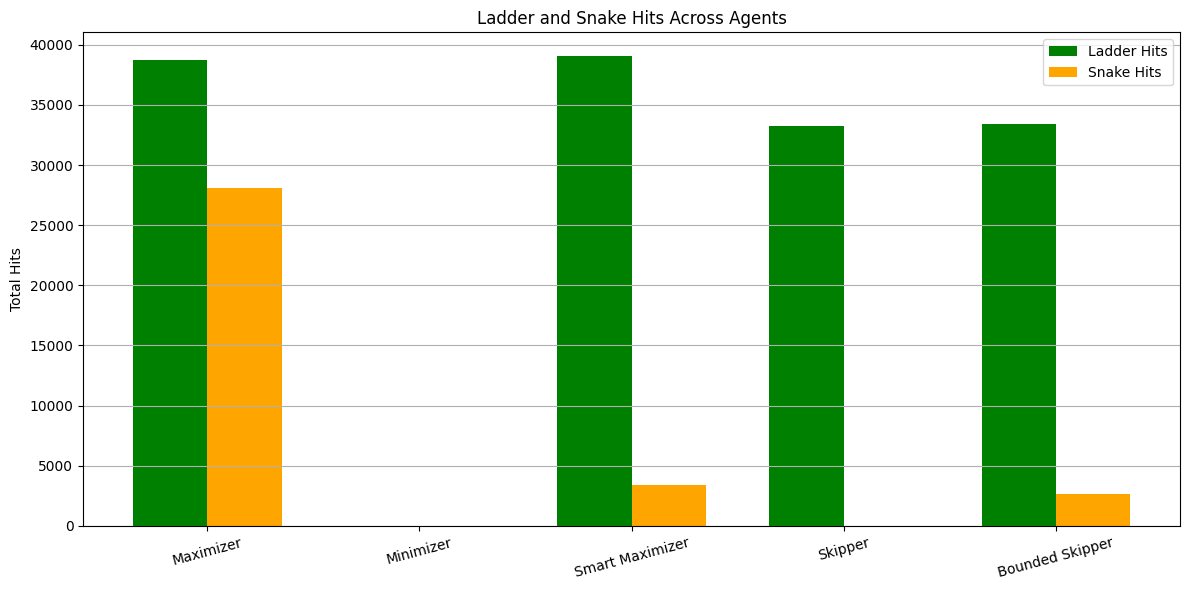

In [53]:
ladder_hits_all = [sum(r['ladder_hits']) for r in agents_results.values()]
snake_hits_all = [sum(r['snake_hits']) for r in agents_results.values()]
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(x - width/2, ladder_hits_all, width, label='Ladder Hits', color='green')
ax.bar(x + width/2, snake_hits_all, width, label='Snake Hits', color='orange')
ax.set_ylabel('Total Hits')
ax.set_title('Ladder and Snake Hits Across Agents')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=15)
ax.legend()
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

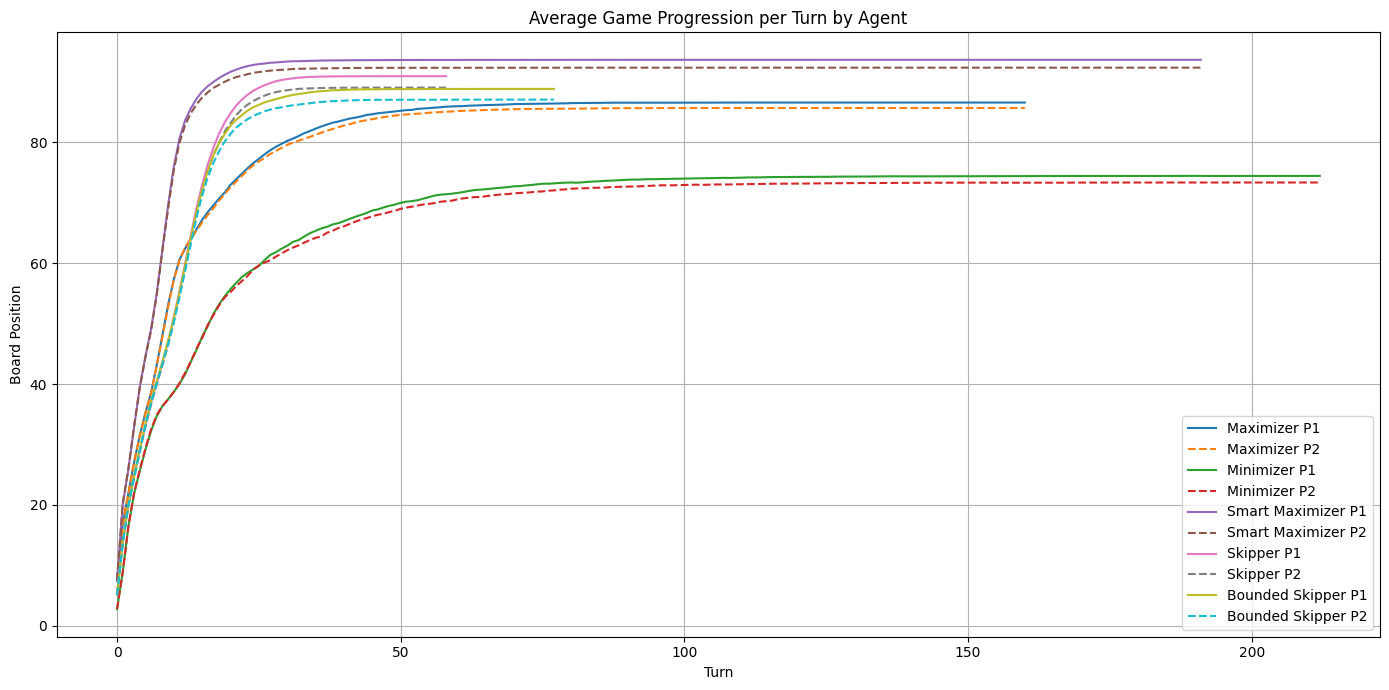

In [54]:
def avg_progression(p0_list, p1_list):
    max_turns = max(len(p) for p in p0_list)
    avg_p0 = np.mean([p + [p[-1]] * (max_turns - len(p)) for p in p0_list], axis=0)
    avg_p1 = np.mean([p + [p[-1]] * (max_turns - len(p)) for p in p1_list], axis=0)
    return avg_p0, avg_p1

plt.figure(figsize=(14, 7))
for label, result in agents_results.items():
    avg_p0, avg_p1 = avg_progression(result['p0_turns'], result['p1_turns'])
    plt.plot(avg_p0, label=f'{label} P1', linestyle='-')
    plt.plot(avg_p1, label=f'{label} P2', linestyle='--')

plt.xlabel('Turn')
plt.ylabel('Board Position')
plt.title('Average Game Progression per Turn by Agent')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Output

In [55]:
import json
import numpy as np

# Number of simulations per agent
num_simulations = 10000
board_size = 100

summary_data = {
    "metadata": {
        "num_simulations_per_agent": num_simulations,
        "board_size": board_size,
        "note": "Each agent played 10,000 games. Only summary stats included. Turn-by-turn progression data is excluded to keep file compact."
    },
    "board": {
        "description": "Dictionary mapping starting position to destination due to snakes or ladders.",
        "mapping": {
            6: 16, 8: 41, 26: 29, 50: 93, 55: 80, 59: 84,
            32: 13, 60: 38, 63: 3, 70: 25, 73: 47,
            82: 43, 89: 53, 97: 12
        }
    },
    "agents": {
        "Maximizer": {
            "strategy": "Roll two dice each turn and choose the higher value.",
            "wins": {
                "player_1_wins": int(wins[0]),
                "player_2_wins": int(wins[1])
            },
            "average_game_length": float(np.mean(game_lengths)),
            "ladder_hits": {
                "player_1": int(ladder_hits[0]),
                "player_2": int(ladder_hits[1])
            },
            "snake_hits": {
                "player_1": int(snake_hits[0]),
                "player_2": int(snake_hits[1])
            }
        },
        "Minimizer": {
            "strategy": "Roll two dice and choose the lower value each turn.",
            "wins": {
                "player_1_wins": int(wins_min[0]),
                "player_2_wins": int(wins_min[1])
            },
            "average_game_length": float(np.mean(game_lengths_min)),
            "ladder_hits": {
                "player_1": int(ladder_hits_min[0]),
                "player_2": int(ladder_hits_min[1])
            },
            "snake_hits": {
                "player_1": int(snake_hits_min[0]),
                "player_2": int(snake_hits_min[1])
            }
        },
        "Smart Maximizer": {
            "strategy": "Roll two dice, choose the value that leads to ladder or avoids snake using board awareness.",
            "wins": {
                "player_1_wins": int(wins_smart[0]),
                "player_2_wins": int(wins_smart[1])
            },
            "average_game_length": float(np.mean(game_lengths_smart)),
            "ladder_hits": {
                "player_1": int(ladder_hits_smart[0]),
                "player_2": int(ladder_hits_smart[1])
            },
            "snake_hits": {
                "player_1": int(snake_hits_smart[0]),
                "player_2": int(snake_hits_smart[1])
            }
        },
        "Skipper": {
            "strategy": "Roll one die; can skip turn if move leads to snake or dangerous nearby zone.",
            "wins": {
                "player_1_wins": int(wins_skipper[0]),
                "player_2_wins": int(wins_skipper[1])
            },
            "average_game_length": float(np.mean(game_lengths_skipper)),
            "ladder_hits": {
                "player_1": int(ladder_hits_skipper[0]),
                "player_2": int(ladder_hits_skipper[1])
            },
            "snake_hits": {
                "player_1": int(snake_hits_skipper[0]),
                "player_2": int(snake_hits_skipper[1])
            }
        },
        "Bounded Skipper": {
            "strategy": "Same as Skipper, but cannot skip more than 3 times in a row. Forced to move after 3 skips.",
            "wins": {
                "player_1_wins": int(wins_bskipper[0]),
                "player_2_wins": int(wins_bskipper[1])
            },
            "average_game_length": float(np.mean(game_lengths_bskipper)),
            "ladder_hits": {
                "player_1": int(ladder_hits_bskipper[0]),
                "player_2": int(ladder_hits_bskipper[1])
            },
            "snake_hits": {
                "player_1": int(snake_hits_bskipper[0]),
                "player_2": int(snake_hits_bskipper[1])
            }
        }
    }
}

# Save to JSON file
file_path = "snake_ladder_agents_game_summery.json"
with open(file_path, "w") as f:
    json.dump(summary_data, f, indent=4)

print(f"Exported to: {file_path}")


Exported to: snake_ladder_agents_game_summery.json
